In [2]:
import pandas as pd

In [3]:
listing = pd.read_csv("listings.csv/listings.csv")

E:\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
listing.head()

id                         listing_url       scrape_id last_scraped  \
0  13913  https://www.airbnb.com/rooms/13913  20190710134553   2019-07-11   
1  15400  https://www.airbnb.com/rooms/15400  20190710134553   2019-07-11   
2  17402  https://www.airbnb.com/rooms/17402  20190710134553   2019-07-11   
3  24328  https://www.airbnb.com/rooms/24328  20190710134553   2019-07-11   
4  25023  https://www.airbnb.com/rooms/25023  20190710134553   2019-07-11   

                                                name  \
0                Holiday London DB Room Let-on going   
1                Bright Chelsea  Apartment. Chelsea!   
2              Superb 3-Bed/2 Bath & Wifi: Trendy W1   
3  Battersea bedroom & office w parking shared ga...   
4      All-comforts 2-bed flat near Wimbledon tennis   

                                             summary  \
0  My bright double bedroom with a large window h...   
1  Lots of windows and light.  St Luke's Gardens ...   
2  Open from June 2018 after a 3-year break, we a...   
3  Artist house, bright high ceiling rooms, priva...   
4  Large, all comforts, 2-bed flat; first floor; ...   

                                               space  \
0  Hello Everyone, I'm offering my lovely double ...   
1  Bright Chelsea Apartment  This is a bright one...   
2  Ready again from June 2018 for bookings after ...   
3  - End of terrace two bedroom house close to So...   
4  10 mins walk to Southfields tube and Wimbledon...   

                                         description experiences_offered  \
0  My bright double bedroom with a large window h...            business   
1  Lots of windows and light.  St Luke's Gardens ...            romantic   
2  Open from June 2018 after a 3-year break, we a...                none   
3  Artist house, bright high ceiling rooms, priva...              family   
4  Large, all comforts, 2-bed flat; first floor; ...                none   

                               neighborhood_overview  ... instant_bookable  \
0  Finsbury Park is a friendly melting pot commun...  ...                f   
1                                     It is Chelsea.  ...                f   
2  Location, location, location! You won't find b...  ...                t   
3  - Battersea is a quiet family area, easy acces...  ...                f   
4  This is a leafy residential area with excellen...  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f                     moderate   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f                     moderate   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             t                                t   
2                             f                                f   
3                             t                                t   
4                             f                                f   

   calculated_host_listings_count  \
0                               3   
1                               1   
2                              14   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            1   
2                                           14   
3                                            1   
4                                            1   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   calculated_hos

In [4]:
print(listing.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [29]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [6]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83850 entries, 0 to 83849
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 67.8+ MB


In [31]:
listing.describe(include='all')

id                            listing_url     scrape_id last_scraped         name                                                                                                                                                                                                                                                                                                                                                                                                                                                                              summary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      space                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description experiences_offered                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     neighborhood_overview                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         notes                                                                                                                                                                                                                                                                                                                                         transit                                                             access                                                                       interaction                                                                          

In [46]:
listing.isnull().sum()[[4,5,6]]

name       26   
summary    3876 
space      25588
dtype: int64

In [47]:
listing.isnull().sum()[listing.isnull().sum().nonzero()[0]]

E:\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


name                            26   
summary                         3876 
space                           25588
description                     1823 
neighborhood_overview           30454
notes                           51115
transit                         30808
access                          37455
interaction                     35041
house_rules                     35001
thumbnail_url                   83850
medium_url                      83850
xl_picture_url                  83850
host_name                       47   
host_since                      47   
host_location                   248  
host_about                      35296
host_response_time              24782
host_response_rate              24782
host_acceptance_rate            83850
host_is_superhost               47   
host_thumbnail_url              47   
host_picture_url                47   
host_neighbourhood              19210
host_listings_count             47   
host_total_listings_count       47   
host_has_pro

In [7]:
type(listing.isnull().sum()[listing.isnull().sum().nonzero()[0]])

E:\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


pandas.core.series.Series

In [42]:
listing.isnull().sum().nonzero()[0]

E:\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


array([  4,   5,   6,   7,   9,  10,  11,  12,  13,  14,  15,  16,  18,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        35,  36,  38,  40,  41,  42,  43,  44,  54,  55,  56,  59,  61,
        62,  63,  64,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,
        95, 105], dtype=int64)

In [49]:
listing.isnull().sum()[listing.isnull().sum().nonzero()[0]].index

E:\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_s

In [8]:
import numpy as np

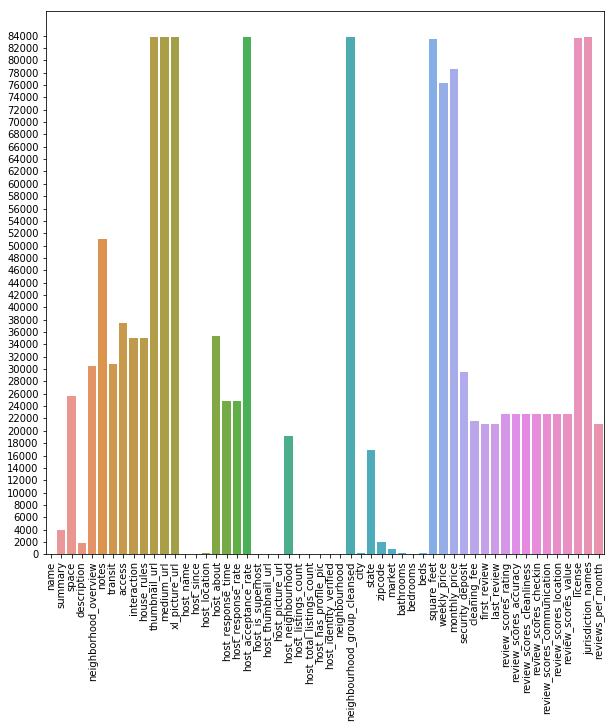

In [9]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,85000,2000))
sns.barplot(x=listing.isnull().sum()[listing.isnull().sum().to_numpy().nonzero()[0]].index,y=listing.isnull().sum()[listing.isnull().sum().to_numpy().nonzero()[0]].values)

In [65]:
listing['monthly_price'] = pd.to_numeric(listing['monthly_price'].apply(lambda x: str(x)),errors='coerce')
listing['price'] = pd.to_numeric(listing['price'].apply(lambda x: str(x)),errors='coerce')
listing['weekly_price'] = pd.to_numeric(listing['weekly_price'].apply(lambda x: str(x)),errors='coerce')
listing['bathrooms'] = pd.to_numeric(listing['bathrooms'].apply(lambda x: str(x)),errors='coerce')
listing['bedrooms'] = pd.to_numeric(listing['bedrooms'].apply(lambda x: str(x)),errors='coerce')
listing['extra_people'] = pd.to_numeric(listing['extra_people'].apply(lambda x: str(x)),errors='coerce')
listing['host_response_rate'] = pd.to_numeric(listing['host_response_rate'].apply(lambda x: str(x)),errors='coerce')
listing['beds'] = pd.to_numeric(listing['beds'].apply(lambda x: str(x)),errors='coerce')

In [41]:
listing['host_since']=pd.to_datetime(listing['host_since'])

In [43]:
listing['host_since'].head()

0   2009-11-16
1   2009-12-05
2   2010-01-04
3   2009-09-28
4   2010-04-03
Name: host_since, dtype: datetime64[ns]

In [13]:
listing['month']=listing.host_since.dt.month
listing['year']=listing.host_since.dt.year

In [14]:
listing_2 = listing._get_numeric_data()

In [15]:
listing_2.head()

id       scrape_id  thumbnail_url  medium_url  xl_picture_url  host_id  \
0  13913  20190710134553            NaN         NaN             NaN    54730   
1  15400  20190710134553            NaN         NaN             NaN    60302   
2  17402  20190710134553            NaN         NaN             NaN    67564   
3  24328  20190710134553            NaN         NaN             NaN    41759   
4  25023  20190710134553            NaN         NaN             NaN   102813   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0                86.0                   NaN                  4.0   
1               100.0                   NaN                  1.0   
2                85.0                   NaN                 19.0   
3               100.0                   NaN                  2.0   
4               100.0                   NaN                  1.0   

   host_total_listings_count  ...  review_scores_communication  \
0                        4.0  ...                         10.0   
1                        1.0  ...                         10.0   
2                       19.0  ...                          9.0   
3                        2.0  ...                         10.0   
4                        1.0  ...                          9.0   

   review_scores_location  review_scores_value  \
0                     9.0                  9.0   
1                    10.0                  9.0   
2                    10.0                  9.0   
3                     9.0                  9.0   
4                     9.0                  9.0   

   calculated_host_listings_count  \
0                               3   
1                               1   
2                              14   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            1   
2                                           14   
3                                            1   
4                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             2   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  month  \
0                                            0               0.15   11.0   
1                                            0               0.73   12.0   
2                                            0               0.41    1.0   
3                                            0               0.88    9.0   
4                                            0               0.69    4.0   

     year  
0  2009.0  
1  2009.0  
2  2010.0  
3  2009.0  
4  2010.0  

[5 rows x 53 columns]

visualization to draw inferences from data

(array([8.3242e+04, 4.9600e+02, 4.3000e+01, 1.9000e+01, 8.0000e+00,
        1.6000e+01, 4.0000e+00, 6.0000e+00, 6.0000e+00, 0.0000e+00,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([    0.        ,   913.33333333,  1826.66666667,  2740.        ,
         3653.33333333,  4566.66666667,  5480.        ,  6393.33333333,
         7306.66666667,  8220.        ,  9133.33333333, 10046.66666667,
        10960.        , 11873.33333333, 12786.66666667, 13700.        ]),
 <a list of 15 Patch objects>)

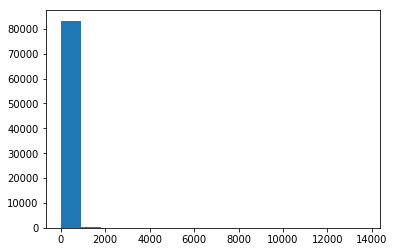

In [16]:
plt.hist(listing['price'],bins=15)

We can see maximum price listing between 0 to 2000

In [71]:
max(listing['price'])

13700.0

Total number of listing by location in London

In [86]:
listing['host_neighbourhood'].value_counts().head(10)

LB of Islington           1860
LB of Brent               1736
Shoreditch                1700
Hampstead                 1558
LB of Haringey            1484
Hammersmith               1450
Battersea                 1389
Whitechapel/Brick Lane    1381
Sands End                 1322
LB of Hackney             1150
Name: host_neighbourhood, dtype: int64

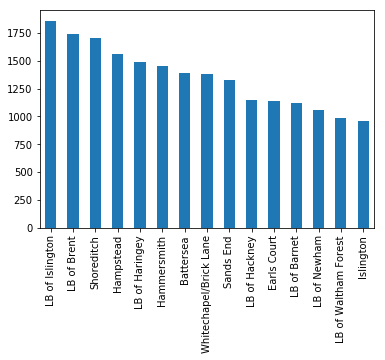

In [17]:
listing['host_neighbourhood'].value_counts().head(15).plot(kind='bar')

**Maps to analyse spread of listings**

In [23]:
%matplotlib inline
base_map = folium.Map(location=[51.56802
, -0.11121], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             listing[['latitude', 'longitude']].iterrows()]
hh = HeatMap(heat_data).add_to(base_map)

base_map

**The heatmap shows distribution of listings across city**

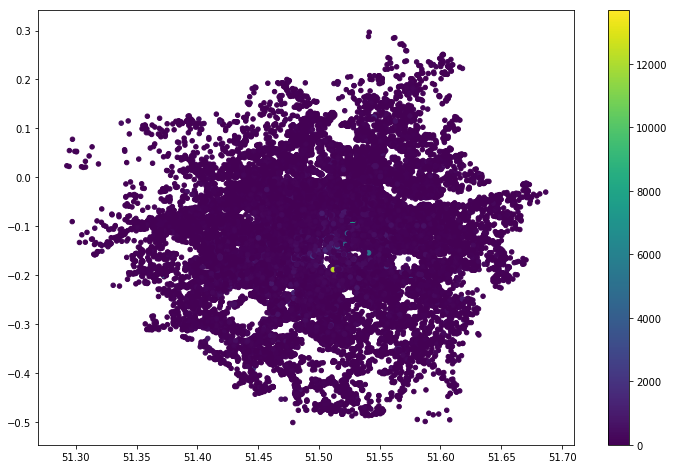

In [24]:
plt.figure(figsize=(12,8))
points = plt.scatter(listing_2['latitude'], listing_2['longitude'], c=listing["price"], s=20, cmap="viridis") 
plt.colorbar(points)

Price distribution across latitudes and longitudes in the city

shows maximum listing between 0-2000 range

**Plotting Neighbourhood with price, room type ,property type**

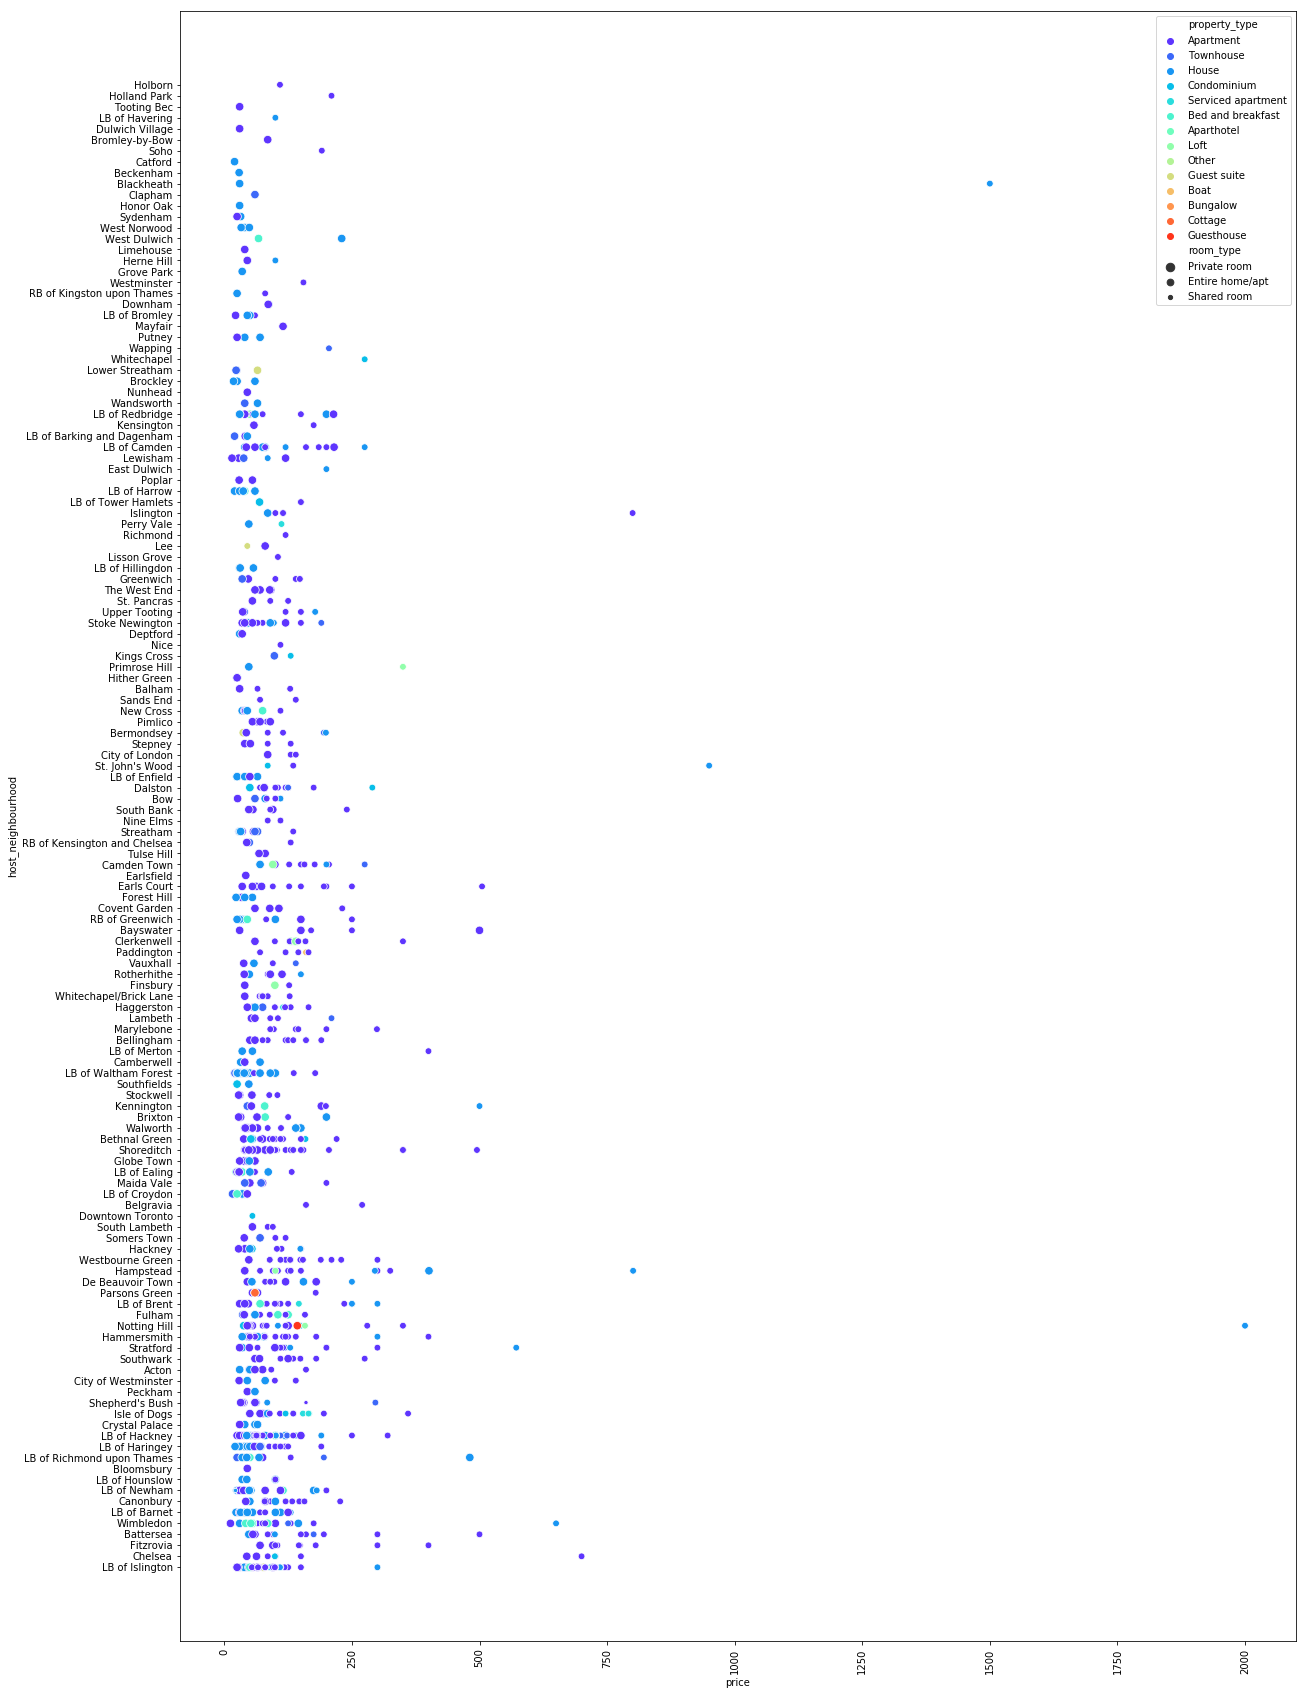

In [26]:
plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.scatterplot(y='host_neighbourhood',x='price',size='room_type',hue='property_type',palette='rainbow',data=listing.head(1000))

**Property type according to latitude and longitude**

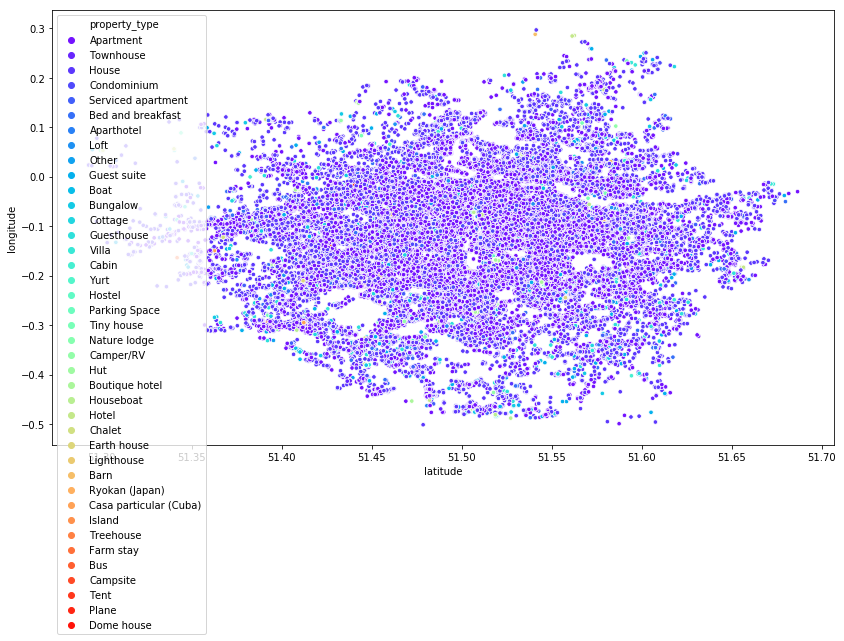

In [28]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=listing_2['latitude'], y=listing_2['longitude'], hue=listing["property_type"], s=20, palette="rainbow") 

**The city centre is mostly Apartment, Townhouse, house, Condominium.
The outskirts we can see Guest Suite, Boat(Maybe because they are cheaper to stay then in the city centre).**

**We can also try looking at the host response time.**

In [31]:
listing['host_response_time'].value_counts()

within an hour        36292
within a few hours    12441
within a day           8530
a few days or more     1805
Name: host_response_time, dtype: int64

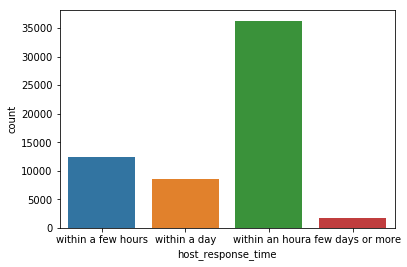

In [32]:
sns.countplot(listing['host_response_time'])

**we see maximum hosts respond within an hour**

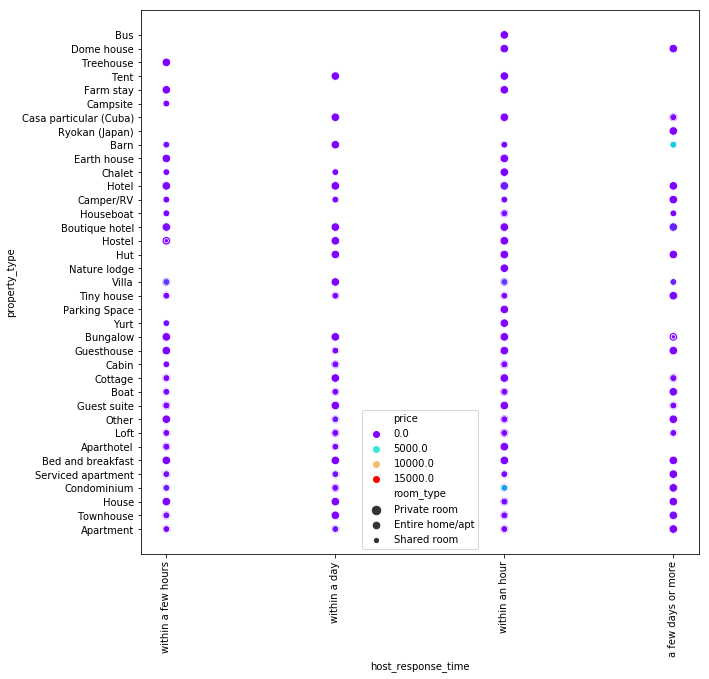

In [33]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='host_response_time',hue='price',size='room_type',y='property_type',palette='rainbow',data=listing)

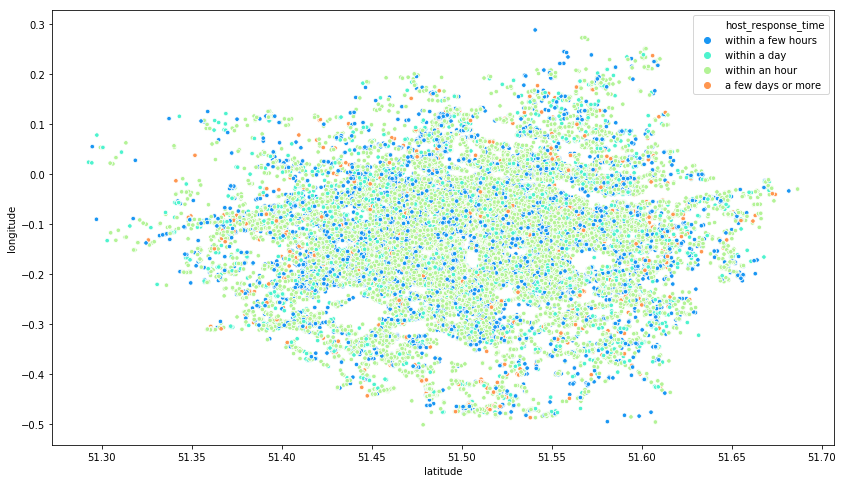

In [34]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=listing_2['latitude'], y=listing_2['longitude'], hue=listing["host_response_time"], s=20, palette="rainbow") 

**We can see that majority of the hosts responded within an hour or within a few hours.
It takes few days on outskirts of the city.
So if it's an urgent business, house should be near or in city centre.**

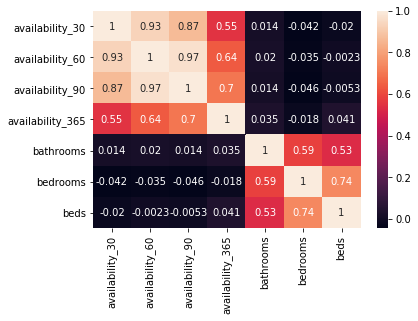

In [35]:
sns.heatmap(listing[['availability_30','availability_60','availability_90',
                    'availability_365','property_type','room_type','bathrooms','bedrooms','beds']].corr(),annot=True)

**No relation of property type , room type or any other feature provided with availability.**

**Using KNN(a simple algo that uses instance-based learning to predict seen and unseen values)**

In [68]:
#Extracting all numeric columns in dataset
num_listing = listing._get_numeric_data()
num_listing.head()

id       scrape_id  thumbnail_url  medium_url  xl_picture_url  host_id  \
0  13913  20190710134553            NaN         NaN             NaN    54730   
1  15400  20190710134553            NaN         NaN             NaN    60302   
2  17402  20190710134553            NaN         NaN             NaN    67564   
3  24328  20190710134553            NaN         NaN             NaN    41759   
4  25023  20190710134553            NaN         NaN             NaN   102813   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0                86.0                   NaN                  4.0   
1               100.0                   NaN                  1.0   
2                85.0                   NaN                 19.0   
3               100.0                   NaN                  2.0   
4               100.0                   NaN                  1.0   

   host_total_listings_count  ...  review_scores_communication  \
0                        4.0  ...                         10.0   
1                        1.0  ...                         10.0   
2                       19.0  ...                          9.0   
3                        2.0  ...                         10.0   
4                        1.0  ...                          9.0   

   review_scores_location  review_scores_value  \
0                     9.0                  9.0   
1                    10.0                  9.0   
2                    10.0                  9.0   
3                     9.0                  9.0   
4                     9.0                  9.0   

   calculated_host_listings_count  \
0                               3   
1                               1   
2                              14   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            1   
2                                           14   
3                                            1   
4                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             2   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  month  \
0                                            0               0.15   11.0   
1                                            0               0.73   12.0   
2                                            0               0.41    1.0   
3                                            0               0.88    9.0   
4                                            0               0.69    4.0   

     year  
0  2009.0  
1  2009.0  
2  2010.0  
3  2009.0  
4  2010.0  

[5 rows x 53 columns]

In [69]:
#Removing NaN values
num_listing=num_listing.drop(['thumbnail_url', 'medium_url', 'xl_picture_url',
                              'square_feet'],axis=1)

In [58]:
num_listing.head()

id       scrape_id  host_id  latitude  longitude  accommodates  price  \
0  13913  20190710134553    54730  51.56802   -0.11121             2   65.0   
1  15400  20190710134553    60302  51.48796   -0.16898             2  100.0   
2  17402  20190710134553    67564  51.52098   -0.14002             6  300.0   
3  24328  20190710134553    41759  51.47298   -0.16376             2  175.0   
4  25023  20190710134553   102813  51.44687   -0.21874             4   65.0   

   guests_included  extra_people  minimum_nights  ...  availability_30  \
0                1          15.0               1  ...               19   
1                2           0.0               3  ...                1   
2                4          10.0               3  ...                3   
3                2           0.0              30  ...                1   
4                2          11.0               4  ...                1   

   availability_60  availability_90  availability_365  number_of_reviews  \
0               42               72               347                 16   
1                9                9               203                 85   
2               14               31               269                 41   
3               24               54               329                 93   
4                2                2                 2                 28   

   number_of_reviews_ltm  calculated_host_listings_count  \
0                      2                               3   
1                      4                               1   
2                     12                              14   
3                      1                               1   
4                      3                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            1   
2                                           14   
3                                            1   
4                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             2   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   calculated_host_listings_count_shared_rooms  
0                                            0  
1                                            0  
2                                            0  
3                                            0  
4                                            0  

[5 rows x 27 columns]

In [75]:
num_listing=num_listing.dropna(axis='columns')

In [54]:
type(num_listing)

pandas.core.frame.DataFrame

In [71]:
num_listing=num_listing.drop(['latitude','longitude'],axis=1)

In [72]:
num_listing.head()

id       scrape_id  host_id  host_response_rate  host_acceptance_rate  \
0  13913  20190710134553    54730                86.0                   NaN   
1  15400  20190710134553    60302               100.0                   NaN   
2  17402  20190710134553    67564                85.0                   NaN   
3  24328  20190710134553    41759               100.0                   NaN   
4  25023  20190710134553   102813               100.0                   NaN   

   host_listings_count  host_total_listings_count  \
0                  4.0                        4.0   
1                  1.0                        1.0   
2                 19.0                       19.0   
3                  2.0                        2.0   
4                  1.0                        1.0   

   neighbourhood_group_cleansed  accommodates  bathrooms  ...  \
0                           NaN             2        1.0  ...   
1                           NaN             2        1.0  ...   
2                           NaN             6        2.0  ...   
3                           NaN             2        1.5  ...   
4                           NaN             4        1.0  ...   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                     9.0                  9.0   
1                         10.0                    10.0                  9.0   
2                          9.0                    10.0                  9.0   
3                         10.0                     9.0                  9.0   
4                          9.0                     9.0                  9.0   

   calculated_host_listings_count  \
0                               3   
1                               1   
2                              14   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            1   
2                                           14   
3                                            1   
4                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             2   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  month  \
0                                            0               0.15   11.0   
1                                            0               0.73   12.0   
2                                            0               0.41    1.0   
3                                            0               0.88    9.0   
4                                            0               0.69    4.0   

     year  
0  2009.0  
1  2009.0  
2  2010.0  
3  2009.0  
4  2010.0  

[5 rows x 47 columns]

**Use Corelation to find dependence on target variable**

In [76]:
num_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83850 entries, 0 to 83849
Data columns (total 25 columns):
id                                              83850 non-null int64
scrape_id                                       83850 non-null int64
host_id                                         83850 non-null int64
accommodates                                    83850 non-null int64
price                                           83850 non-null float64
guests_included                                 83850 non-null int64
extra_people                                    83850 non-null float64
minimum_nights                                  83850 non-null int64
maximum_nights                                  83850 non-null int64
minimum_minimum_nights                          83850 non-null int64
maximum_minimum_nights                          83850 non-null int64
minimum_maximum_nights                          83850 non-null int64
maximum_maximum_nights                          83850 non-n

In [79]:
num_listing.iloc[:,3:9].corr()

accommodates     price  guests_included  extra_people  \
accommodates         1.000000  0.309819         0.517850      0.110906   
price                0.309819  1.000000         0.222083      0.043178   
guests_included      0.517850  0.222083         1.000000      0.268869   
extra_people         0.110906  0.043178         0.268869      1.000000   
minimum_nights       0.001752  0.041155        -0.012808     -0.006498   
maximum_nights      -0.000582 -0.000772        -0.001740      0.003591   

                 minimum_nights  maximum_nights  
accommodates           0.001752       -0.000582  
price                  0.041155       -0.000772  
guests_included       -0.012808       -0.001740  
extra_people          -0.006498        0.003591  
minimum_nights         1.000000       -0.000502  
maximum_nights        -0.000502        1.000000

In [80]:
from sklearn.model_selection import train_test_split
x=num_listing.iloc[:,3:9]
y=num_listing['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

**using k = 5**

**fit the model**

**predict the values**

In [82]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(pred)

[114.6 249.8  40.  ...  70.   25.2  44.8]


**Plotting a curve to relate our predicted values to the actual ones**

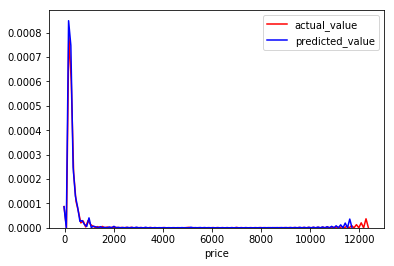

In [83]:
actual = sns.distplot(y_test,hist=False,color='r',label='actual_value')
predicted = sns.distplot(pred,hist=False,color='blue',label='predicted_value')